In [2]:
import pandas as pd
import numpy as np

In [423]:
df = pd.read_csv('chocolate (1).csv') 
df.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [424]:
def Rating(df):
    if 1 <= df['Rating'] <2:
        val = 'Worst'
    elif 2<=df['Rating'] <3:
        val = 'Bad'
    elif 3<=df['Rating'] <4:
        val = 'Good'
    else:
        val = 'Excellent'
    return val
df['Rating Category'] = df.apply(Rating, axis=1)
df.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Rating Category
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,Good
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo,Bad
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo,Good
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo,Good
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru,Good


In [425]:
# tìm dữ liệu bị mất
for col in df.columns:
    per_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,per_missing))

Company-0.0%
Specific Bean Origin or Bar Name-0.0%
REF-0.0%
Review Date-0.0%
Cocoa Percent-0.0%
Company Location-0.0%
Rating-0.0%
Bean Type-0.0005571030640668524%
Broad Bean Origin-0.0005571030640668524%
Rating Category-0.0%


In [426]:
# kiểu dữ liệu
df.dtypes

Company                              object
Specific Bean Origin or Bar Name     object
REF                                   int64
Review Date                           int64
Cocoa Percent                        object
Company Location                     object
Rating                              float64
Bean Type                            object
Broad Bean Origin                    object
Rating Category                      object
dtype: object

In [396]:
df.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Rating Category
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,Good
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo,Bad
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo,Good
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo,Good
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru,Good


In [34]:
import matplotlib.pyplot as plt

# Công ty nào có nhiều mẫu mã sản phẩm nhất

In [427]:
Chart_1 = df['Company'].value_counts()[0:10] 

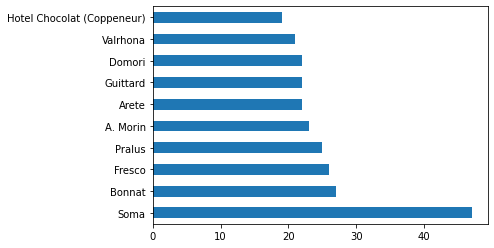

In [428]:
Chart_1.plot(kind='barh');

# công ty nào có nhiều lượt rating nhất và rating của từng công ty

In [107]:
df.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Rating Category
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,Good
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo,Bad
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo,Good
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo,Good
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru,Good


In [375]:
agg_tips = df.groupby(['Company','Rating Category'])['Rating Category'].count().unstack().fillna(0) # số rating của mỗi công ty là bao nhiêu

In [429]:
agg_tips['row_sum']= agg_tips.sum(axis=1)
Top_10 = agg_tips.sort_values(by ='row_sum',ascending=False,key=None)[0:10]# top 10 công ty có nhiều lượt rating cao nhất
Top_10

Rating Category,Awesome,Bad,Excellent,Good,Worst,row_sum
Company,,,,,,
Soma,0.0,2.0,10.0,35.0,0.0,188.0
Bonnat,0.0,2.0,8.0,16.0,1.0,108.0
Fresco,0.0,3.0,4.0,19.0,0.0,104.0
Pralus,0.0,2.0,3.0,20.0,0.0,100.0
A. Morin,0.0,4.0,3.0,16.0,0.0,92.0
Domori,0.0,0.0,3.0,19.0,0.0,88.0
Arete,0.0,1.0,3.0,18.0,0.0,88.0
Guittard,0.0,4.0,0.0,18.0,0.0,88.0
Valrhona,0.0,3.0,5.0,12.0,1.0,84.0


In [392]:
Chart_2=Top_10.drop('row_sum',axis=1) # bỏ cột đếm tổng số rating

<AxesSubplot:ylabel='Company'>

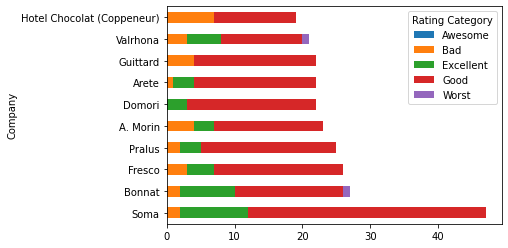

In [393]:
Chart_2.plot(kind='barh', stacked=True)

# số lượng rating qua các năm

In [397]:
df.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Rating Category
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,Good
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo,Bad
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo,Good
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo,Good
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru,Good


In [398]:
Rating_by_Year =df.groupby('Review Date').count()['Rating Category']
Rating_by_Year

Review Date
2006     72
2007     77
2008     93
2009    123
2010    111
2011    165
2012    195
2013    184
2014    247
2015    285
2016    219
2017     24
Name: Rating Category, dtype: int64

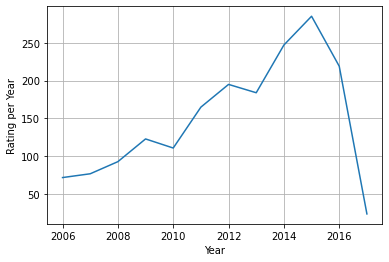

In [402]:
plt.plot(Rating_by_Year)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Rating per Year')
plt.show()

# tỉ lệ ca cao có rating lớn

In [405]:
Percent=df.groupby(['Cocoa Percent','Rating Category'])['Rating Category'].count().unstack().fillna(0)
Percent['row_sum']= Percent.sum(axis=1)
Top_10_percent = Percent.sort_values(by ='row_sum',ascending=False,key=None)[0:10]
Top_10_percent

Rating Category,Awesome,Bad,Excellent,Good,Worst,row_sum
Cocoa Percent,,,,,,
70%,2.0,126.0,43.0,497.0,4.0,672.0
75%,0.0,56.0,17.0,149.0,0.0,222.0
72%,0.0,40.0,11.0,137.0,1.0,189.0
65%,0.0,16.0,2.0,59.0,1.0,78.0
80%,0.0,29.0,1.0,42.0,0.0,72.0
74%,0.0,13.0,4.0,33.0,0.0,50.0
68%,0.0,10.0,2.0,35.0,0.0,47.0
60%,0.0,13.0,1.0,29.0,0.0,43.0
73%,0.0,9.0,1.0,29.0,1.0,40.0


In [410]:
Chart_3=Top_10_percent.drop('row_sum',axis=1)

<AxesSubplot:xlabel='Cocoa Percent'>

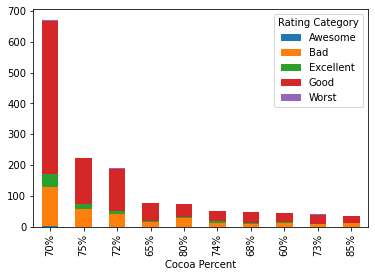

In [411]:
Chart_3.plot(kind='bar', stacked=True)

# giống hạt có rating cao

In [412]:
df.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Rating Category
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,Good
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo,Bad
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo,Good
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo,Good
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru,Good


In [415]:
Bean=df.groupby(['Bean Type','Rating Category'])['Rating Category'].count().unstack().fillna(0)
Bean['row_sum']= Bean.sum(axis=1)
Top_10_Bean = Bean.sort_values(by ='row_sum',ascending=False,key=None)[1:11]
Top_10_Bean

Rating Category,Awesome,Bad,Excellent,Good,Worst,row_sum
Bean Type,,,,,,
Trinitario,1.0,84.0,25.0,308.0,1.0,419.0
Criollo,0.0,33.0,14.0,106.0,0.0,153.0
Forastero,0.0,25.0,4.0,56.0,2.0,87.0
Forastero (Nacional),0.0,9.0,3.0,40.0,0.0,52.0
Blend,1.0,5.0,5.0,30.0,0.0,41.0
"Criollo, Trinitario",0.0,6.0,4.0,29.0,0.0,39.0
Forastero (Arriba),0.0,16.0,1.0,18.0,2.0,37.0
Criollo (Porcelana),0.0,1.0,3.0,6.0,0.0,10.0
"Trinitario, Criollo",0.0,3.0,0.0,6.0,0.0,9.0


<AxesSubplot:ylabel='Bean Type'>

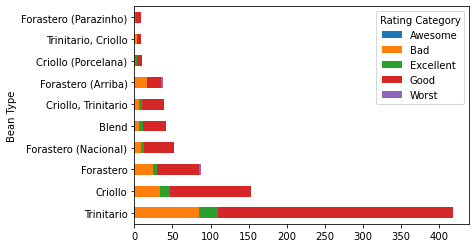

In [417]:
Chart_4=Top_10_Bean.drop('row_sum',axis=1)
Chart_4.plot(kind='barh', stacked=True)